# Relative Purchase Power BRL x US

In [52]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

import matplotlib

In [53]:
df = pd.read_csv('C:/Andre files/Relative_Purchase_Parity/BRL_PPP.csv',index_col='Date',parse_dates=True)
df.head(10)

,Brazil_CPI_Variation,US_CPI,BRL_US
Date,,,
2004-01-01,0.76,0.54,0.3411
2004-01-02,0.61,0.64,0.3442
2004-01-03,0.47,0.32,0.3454
2004-01-04,0.37,0.59,0.3413
2004-01-05,0.51,0.32,0.3138
2004-01-06,0.71,-0.16,0.3241
2004-01-07,0.91,0.05,0.3294
2004-01-08,0.69,0.21,0.3388
2004-01-09,0.33,0.53,NaN


In [54]:
# Finding missing values
df.isna().sum().sort_values(ascending=False)

BRL_US                  18
Brazil_CPI_Variation     0
US_CPI                   0
dtype: int64

In [55]:
# Calculate the mean of the first 8 values
mean_fill_value = df['BRL_US'].iloc[:8].mean()

# Fill the missing values with the mean
df['BRL_US'] = df['BRL_US'].fillna(mean_fill_value)

In [56]:
df.head(16)

,Brazil_CPI_Variation,US_CPI,BRL_US
Date,,,
2004-01-01,0.76,0.54,0.341100
2004-01-02,0.61,0.64,0.344200
2004-01-03,0.47,0.32,0.345400
2004-01-04,0.37,0.59,0.341300
2004-01-05,0.51,0.32,0.313800
2004-01-06,0.71,-0.16,0.324100
2004-01-07,0.91,0.05,0.329400
2004-01-08,0.69,0.21,0.338800
2004-01-09,0.33,0.53,0.334763


In [57]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 230 entries, 2004-01-01 to 2023-01-02
Data columns (total 3 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Brazil_CPI_Variation  230 non-null    float64
 1   US_CPI                230 non-null    float64
 2   BRL_US                230 non-null    float64
dtypes: float64(3)
memory usage: 7.2 KB


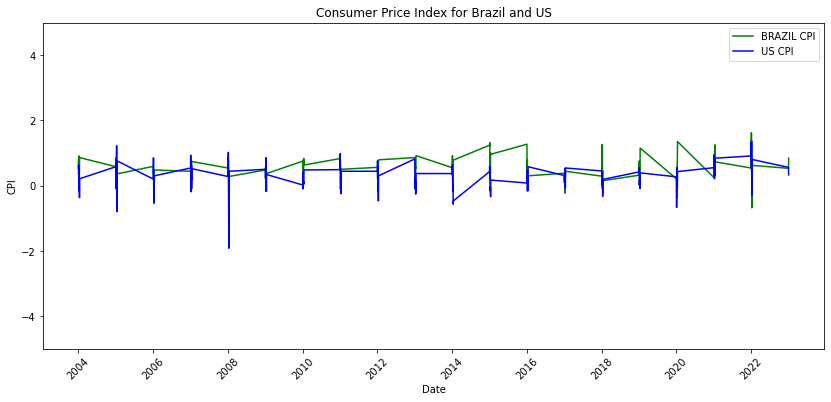

In [58]:
import matplotlib.dates as mdates

# Set figure size
plt.figure(figsize=(14, 6))

# Plot the first variable
plt.plot(df['Brazil_CPI_Variation'], color='green', label='BRAZIL CPI')

# Plot the second variable
plt.plot(df['US_CPI'], color='blue', label='US CPI')

# Set the x-axis intervals (e.g., 2-year intervals)
plt.gca().xaxis.set_major_locator(mdates.YearLocator(base=2))
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y'))

# Set title and labels
plt.title('Consumer Price Index for Brazil and US')
plt.xlabel('Date')
plt.ylabel('CPI')

# Rotate the x-axis tick labels if needed
plt.xticks(rotation=45)

# Set y-axis range
plt.ylim(-5, 5)

# Display legend
plt.legend()

# Display the chart
plt.show()

In [59]:
df.tail()

,Brazil_CPI_Variation,US_CPI,BRL_US
Date,,,
2022-01-10,0.59,-0.10,0.1891
2022-01-11,0.41,-0.31,0.1898
2022-01-12,0.62,0.80,0.1893
2023-01-01,0.53,0.56,0.1955
2023-01-02,0.84,0.33,0.1923


In [60]:
# Calculate the cumulative inflation for the BRL
BR_inflation_percentage = df['Brazil_CPI_Variation']
BR_cumulative_inflation = (1 + BR_inflation_percentage / 100).cumprod().iloc[-1]

# Calculate the cumulative inflation for the US
us_inflation_percentage = df['US_CPI']
us_cumulative_inflation = (1 + us_inflation_percentage / 100).cumprod().iloc[-1]

# Print the results
print(f"Cumulative Inflation (BR): {BR_cumulative_inflation:.5f} ({BR_cumulative_inflation * 100:.2f}%)")
print(f"Cumulative Inflation (US): {us_cumulative_inflation:.5f} ({us_cumulative_inflation * 100:.2f}%)")

Cumulative Inflation (BR): 2.94381 (294.38%)
Cumulative Inflation (US): 1.62981 (162.98%)


In [61]:
# Calculate the exchange rate difference
initial_rate = df['BRL_US'].iloc[0]
current_rate = df['BRL_US'].iloc[-1]
exchange_rate_difference = ((current_rate - initial_rate) / initial_rate) * 100

# Print the result
print(f"Exchange Rate Difference: {exchange_rate_difference:.2f}%")

Exchange Rate Difference: -43.62%


A -43.62% exchange rate difference suggests that the BRL has experienced a significant decline in value relative to the USD. This can have various implications, such as reduced purchasing power of the BRL when exchanging it for USD or increased costs for imports denominated in USD.

In [62]:
# Calculate the purchasing power loss
purchasing_power_loss = BR_cumulative_inflation * exchange_rate_difference

# Print the result
print(f"Purchasing Power Loss: {purchasing_power_loss:.5f}")

Purchasing Power Loss: -128.41938


The calculated purchasing power loss of -128.41938 represents a negative value, indicating a loss in purchasing power. It implies that the combined effect of cumulative inflation and the exchange rate difference has eroded the value of the currency (in this case, BRL) in terms of purchasing goods and services.

A negative purchasing power loss suggests that the value of money has decreased over time. In other words, with a purchasing power loss of -128.41938, it means that the amount of goods and services that can be purchased with a given amount of BRL has decreased.

In [63]:
# Calculate the relative purchasing power parity
relative_purchasing_power_parity = BR_cumulative_inflation / (1 + exchange_rate_difference)
# Print the result
print(f"Relative Purchasing Power Parity: {relative_purchasing_power_parity:.5f}")

Relative Purchasing Power Parity: -0.06907


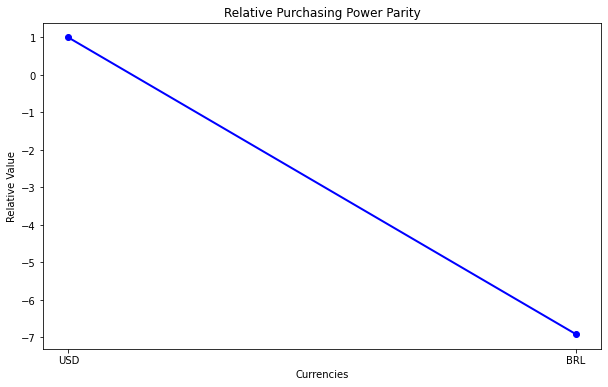

-6.907000000000001


In [64]:
# Relative purchasing power parity value
relative_purchasing_power_parity = -0.06907 *100

# Create a line chart
plt.figure(figsize=(10, 6))
plt.plot([0, 1], [1, relative_purchasing_power_parity], color='blue', marker='o', linestyle='-', linewidth=2)

# Title and labels
plt.title('Relative Purchasing Power Parity')
plt.xlabel('Currencies')
plt.ylabel('Relative Value')

# Set the x-axis ticks and labels
plt.xticks([0, 1], ['USD', 'BRL'])

# Display the chart
plt.show()
print(relative_purchasing_power_parity)


The calculated relative purchasing power parity value of -0.06907 indicates a negative value. Relative purchasing power parity is a measure that compares the cumulative inflation rate of a currency (in this case, BRL) to the exchange rate difference with another currency (USD).

A negative relative purchasing power parity suggests that, considering the combined effect of cumulative inflation and the exchange rate difference, the purchasing power of BRL has decreased relative to USD. In other words, it implies that the value of BRL has weakened in terms of its ability to purchase goods and services compared to USD.

In [67]:
# Calculate the fair FX value
last_exchange_rate = df['BRL_US'].iloc[-1]
fair_fx_value = (1 + df['Brazil_CPI_Variation'].sum() / 100) / (1 + df['US_CPI'].sum() / 100) * last_exchange_rate

# Print the result
print(f"Fair FX Value (BRL/USD): {fair_fx_value:.4f}")

Fair FX Value (BRL/USD): 0.2687


In [68]:
brl_usd_fair_value = 0.2687
usd_brl_fair_value = 1 / brl_usd_fair_value

print(f"Fair FX Value (USD/BRL): {usd_brl_fair_value:.4f}")

Fair FX Value (USD/BRL): 3.7216


In [69]:
US_Big_Mac = 5.50
BRL_Big_Mac = 22.90
Big_Mac_Fair_Value_BRL = US_Big_Mac * 3.7216
print(Big_Mac_Fair_Value_BRL)

20.4688
